<a href="https://colab.research.google.com/github/mike-jansen/misinformation-analysis-capstone/blob/main/analysis_on_covid_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup
Link to python package: https://pypi.org/project/NRCLex/

In [ ]:
!pip install NRCLex
from nrclex import NRCLex

import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')

from collections import defaultdict
import json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43308 sha256=b364dd23fb24fb6a0adc18fc07cbe215f97173d9e344b8730615d7a0ca2924c4
  Stored in directory: /root/.cache/pip/wheels/d2/10/44/6abfb1234298806a145fd6bcaec8cbc712e88dd1cd6cb242fa
Successfully built NRCLex
Mounted at /content/drive/


In [ ]:
# read the csv (can be slow)
path = '/content/drive/My Drive/Colab Notebooks/data/research/US Covid Tweets/Combined_US_Covid_Tweets.csv'
df = pd.read_csv(path)

<ipython-input-2-745d29b7bf92>:3: DtypeWarning: Columns (28,29,30,40,42,43,44,68,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [ ]:
# import the punkt tokenizer for NRCLex to work
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True


# Calculating the Scores

In [ ]:
# filter out the text of the tweets
text_only = df['text']
emotions_count = defaultdict(int)
raw_count = defaultdict(int)

for sentence in text_only[0:1000]:
  lexicon = NRCLex(sentence)
  top_emotions = lexicon.top_emotions
  raw_scores = lexicon.raw_emotion_scores

  for emotion, score in top_emotions:
    emotions_count[emotion] += score

  for emotion, score in raw_scores.items():
    raw_count[emotion] += score

  # print("Text: ", sentence)
  # print("Top Emotions: ", top_emotions)
  # print("Raw Scores: ", raw_scores)
  # print()

#Results

In [ ]:
# Printing the output

print("Top Emotions: ")
# Sort the emotion counts dictionary by value in descending order
sorted_emotion_counts = dict(sorted(emotions_count.items(), key=lambda x: x[1], reverse=True))
# Print the sorted emotion counts dictionary with indentation
print(json.dumps(sorted_emotion_counts, indent=4))

print("Raw Counts:")
# Sort the emotion counts dictionary by value in descending order
sorted_raw_counts = dict(sorted(raw_count.items(), key=lambda x: x[1], reverse=True))
# Print the sorted emotion counts dictionary with indentation
print(json.dumps(sorted_raw_counts, indent=4))

Top Emotions: 
{
    "negative": 179.78147098560348,
    "positive": 129.41005472425744,
    "fear": 83.89673430284886,
    "trust": 60.03866778216625,
    "anticipation": 34.656727830992516,
    "sadness": 18.608671720436423,
    "joy": 9.307373019137726,
    "anger": 7.862720612720613,
    "disgust": 6.2999000999001,
    "surprise": 6.06991341991342,
    "anticip": 0.0
}
Raw Counts:
{
    "negative": 1235,
    "fear": 911,
    "positive": 806,
    "sadness": 515,
    "trust": 490,
    "anticipation": 347,
    "anger": 294,
    "surprise": 249,
    "disgust": 195,
    "joy": 171
}


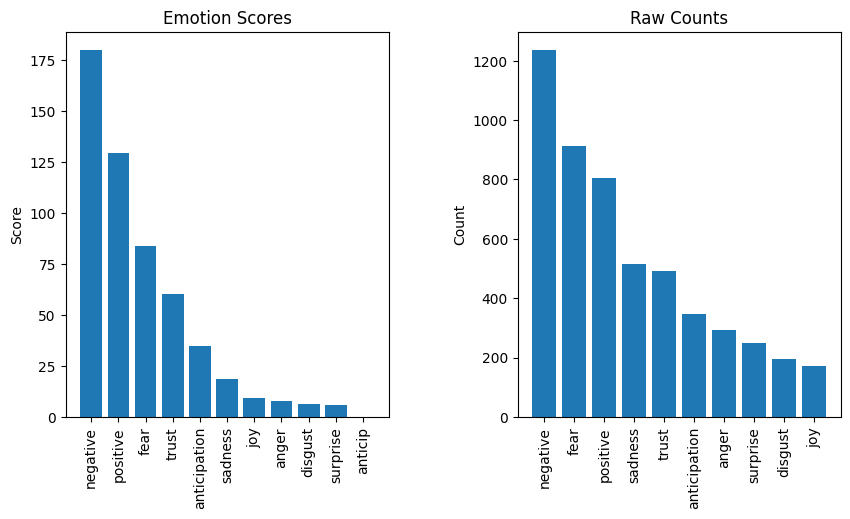

In [ ]:
# Plotting the output
import matplotlib.pyplot as plt

# Extract emotion categories and scores as separate lists for the first metric
categories1 = list(sorted_emotion_counts.keys())
scores1 = list(sorted_emotion_counts.values())

# Extract categories and raw counts as separate lists for the second metric
categories2 = list(sorted_raw_counts.keys())
scores2 = list(sorted_raw_counts.values())

# Create a grid of subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first graph on the left subplot
axs[0].bar(categories1, scores1)
axs[0].set_ylabel('Score')
axs[0].set_title('Emotion Scores')

# Plot the second graph on the right subplot
axs[1].bar(categories2, scores2)
axs[1].set_ylabel('Count')
axs[1].set_title('Raw Counts')

# Rotate x-axis labels on both subplots
for ax in axs:
    plt.sca(ax)
    plt.xticks(rotation=90)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

# LIWC

In [ ]:
# read the LIWC scores
path = '/content/drive/My Drive/Colab Notebooks/data/research/US Covid Tweets/LIWC-22 Results - Combined_US_Covid_Tweets - LIWC Analysis.csv'
LIWC_results = pd.read_csv(path)

# combine the text column with the LIWC results
combined = pd.concat([df['text'], LIWC_results], axis=1)
# filter out the categories that we care about
filtered = combined.loc[:, ['text', 'Analytic', 'Authentic', 'BigWords', 'ppron']]

In [ ]:
analytic_mean = filtered['Analytic'].mean()
analytic_median = filtered['Analytic'].median()
authentic_mean = filtered['Authentic'].mean()
authentic_median = filtered['Authentic'].median()
bigwords_mean = filtered['BigWords'].mean()
bigwords_median = filtered['BigWords'].median()
ppron_mean = filtered['ppron'].mean()
ppron_median = filtered['ppron'].median()

print("analytic_mean: ", analytic_mean)
print("analytic_median: ", analytic_median)
print("authentic_mean: ", authentic_mean)
print("authentic_median: ", authentic_median)
print("bigwords_mean: ", bigwords_mean)
print("bigwords_median: ", bigwords_median)
print("ppron_mean: ", ppron_mean)
print("ppron_median: ", ppron_median)

analytic_mean:  70.77597538400688
analytic_median:  83.52
authentic_mean:  25.408876814556002
authentic_median:  10.18
bigwords_mean:  24.384139626870585
bigwords_median:  23.53
ppron_mean:  4.483379128485727
ppron_median:  3.23


# Plotting LIWC values

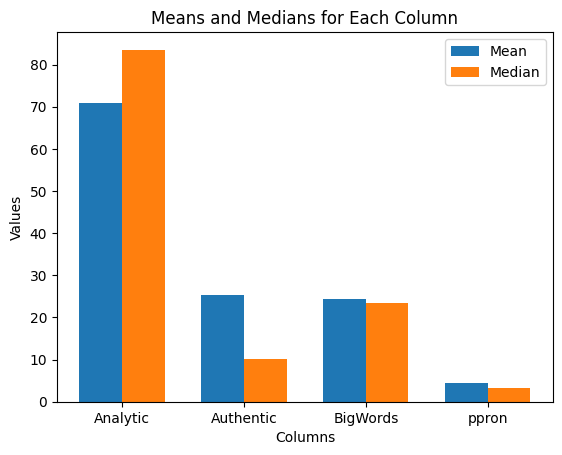

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of means and medians for each column
means = [analytic_mean, authentic_mean, bigwords_mean, ppron_mean]
medians = [analytic_median, authentic_median, bigwords_median, ppron_median]
# Set the labels for the x-axis
labels = ['Analytic', 'Authentic', 'BigWords', 'ppron']
# Set the positions of the bars on the x-axis
x = np.arange(len(labels))
# Set the width of the bars
width = 0.35
# Create the figure and axis objects
fig, ax = plt.subplots()
# Add the means bars
rects1 = ax.bar(x - width/2, means, width, label='Mean')
# Add the medians bars
rects2 = ax.bar(x + width/2, medians, width, label='Median')

# Add labels, title, and legend
ax.set_xlabel('Columns')
ax.set_ylabel('Values')
ax.set_title('Means and Medians for Each Column')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the chart
plt.show()

In [ ]:
q1 = filtered['Analytic'].quantile(0.25)
q3 = filtered['Analytic'].quantile(0.75)

print("Lower quartile:", q1)
print("Upper quartile:", q3)

Lower quartile: 52.34
Upper quartile: 94.5


<ipython-input-11-b970118b5bd6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(analytic_score, kde_kws={'linewidth': 3})


<Axes: xlabel='Analytic', ylabel='Density'>

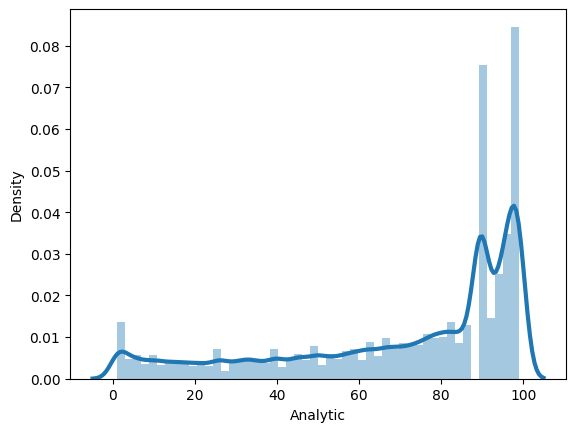

In [ ]:
import seaborn as sns
analytic_score = filtered['Analytic']
sns.distplot(analytic_score, kde_kws={'linewidth': 3})

#Retrieving some class 1 tweets

In [ ]:
# calculate the thresholds for each important category
score_columns = ['Analytic', 'Authentic', 'BigWords']
thresholds = {}
for col in score_columns:
    col_stats = filtered[col].dropna().describe(percentiles=[0.05])
    threshold = col_stats['5%']
    thresholds[col] = threshold
print(thresholds)

# retrieve tweets that fall within the thresholds
class1_tweets = filtered[(filtered[score_columns[0]] <= thresholds[score_columns[0]]) &
                         (filtered[score_columns[1]] <= thresholds[score_columns[1]]) &
                         (filtered[score_columns[2]] <= thresholds[score_columns[2]])]
print(class1_tweets)

{'Analytic': 7.78, 'Authentic': 1.0, 'BigWords': 9.52}
                                                     text  Analytic  \
1625    Good thing I got my dog his shots so he’s prot...      3.80   
3905    What is her name let's get her viral https://t...      1.30   
4182    It’s like he knows he’s daddy is sad 😢 https:/...      4.85   
4577                            this corona virus no joke      3.80   
7501    Let’s hope it doesn’t get here 😷 https://t.co/...      1.00   
...                                                   ...       ...   
755429  Everyone back off. It’s not bc he hasn’t read ...      1.00   
755987  @Kno Yes us can!!! Can I get a uuuuuuuhhhhhhh ...      2.87   
756775                                   Nas is that dude      1.00   
757944  I really just want to have a daughter so I can...      1.00   
758340                            What would kobe do? 🐍 🧠      1.00   

        Authentic  BigWords  ppron  
1625          1.0      6.67  26.67  
3905          1.0 

In [ ]:
# randomly retrieve 20 of the tweets
class1_tweets_sample = class1_tweets.sample(n=20)
print(class1_tweets_sample['text'])

379181    And who’s fault is that? Huh?? https://t.co/Ma...
317411    Bless his heart! 🥺 Woody you're just too cute ...
260047    So masks work is what you are saying. https://...
662900    Doubt he really caught COVID. Just saying it s...
192033    @kneerecon What would Trump even say? "He knew...
620062    @DSmithScenes What year is it? Also is that gu...
639365    This man said “she’s one of the dumbest people...
95095     Anyone know why they would do this?  https://t...
29052     How could I forget this would happen https://t...
38142     It’s the least I could do. https://t.co/GBgVee...
133220    Are you SURE?!? Have you TESTED this?!? ;-)\n\...
664051    As much as I want covid 19 to win, Mike pence ...
462049    @tubboinabox i don’t think he’s gonna. he said...
255154    let’s see what this 2nd dose of covid is all a...
206319    @JoeBiden If we can defeat Donald Trump, we ca...
651669                     2020 is just really ghetto 🤦🏾‍♂️
44148     Where is Nancy Pelosi when we 

In [ ]:
#class1_tweets_sample.to_csv('/content/drive/MyDrive/Colab Notebooks/data/research/class1_tweets_sample.csv', index=False)